In [1]:
import numpy as np
import pandas as pd
import plotly as plt
import matplotlib as mpl
from plotly import express
import seaborn as sn
import matplotlib.pyplot as py

In [2]:
df_tracks = pd.read_csv('dataset/tracks.csv')
df_genre = pd.read_csv('dataset/SpotifyFeatures.csv')
df_artist = pd.read_csv('dataset/artists.csv')

In [3]:
# Checking for NULL values in Tracks dataset

df_tracks.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [4]:
# Converting duration column from ms to seconds for tracks dataset

df_tracks.rename(columns = {'duration_ms':'duration_s'}, inplace = True)
df_tracks['duration_s'] = df_tracks['duration_s'].divide(1000).round(2)

In [5]:
# Checking for NULL values in Artist dataset

df_artist.isnull().sum()

id             0
followers     13
genres         0
name           0
popularity     0
dtype: int64

In [6]:
# Filtering out 30 most followed artists with popularity more than 80%

df_artist[['name', 'genres', 'followers', 'popularity']].where(df_artist['popularity']>80).sort_values(by=['followers'], ascending=0).iloc[:30]

,name,genres,followers,popularity
144138,Ed Sheeran,"['pop', 'uk pop']",78900234.0,92.0
144485,Ariana Grande,"['pop', 'post-teen pop']",61301006.0,95.0
313676,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",54416812.0,98.0
144481,Justin Bieber,"['canadian pop', 'pop', 'post-teen pop']",44606973.0,100.0
144488,Eminem,"['detroit hip hop', 'hip hop', 'rap']",43747833.0,94.0
313508,Rihanna,"['barbadian pop', 'dance pop', 'pop', 'post-te...",42244011.0,92.0
126658,Billie Eilish,"['electropop', 'pop']",41792604.0,92.0
126338,Taylor Swift,"['pop', 'post-teen pop']",38869193.0,98.0
126339,Imagine Dragons,"['modern rock', 'rock']",33665795.0,89.0
144496,Queen,"['classic rock', 'glam rock', 'rock']",33483326.0,89.0


In [7]:
# 10 Least popular songs (popularity < 10%)

df_tracks[['name', 'artists', 'release_date', 'duration_s', 'popularity', 'explicit']].where(df_tracks['popularity']<10).sort_values(by=['popularity'], ascending=1).iloc[:10]

,name,artists,release_date,duration_s,popularity,explicit
123297,"The Soldier's Tale, Suite No. 2: I. The Soldie...","['Igor Stravinsky', 'On the Town Orchestra', '...",1947,99.34,0.0,0.0
360281,Devastating Beat Creators - Instrumental,['Gametightelectro'],2016-04-26,240.61,0.0,0.0
119701,Pahuna Mhanoni Aala,['Lata Mangeshkar'],1950-12-31,194.60,0.0,0.0
119702,Padmakali Sakaal Khonje,['Supriti Ghosh'],1950-12-01,189.25,0.0,0.0
119703,Tetoia zoi,['Prodromos Tsaousakis'],1950-01-01,216.13,0.0,0.0
119704,Gialelem,['Stella Xaskil'],1950-01-01,211.36,0.0,0.0
360282,Rockman Got 'Em,['Gametightelectro'],2016-05-03,189.81,0.0,0.0
119706,"Symphony No. 4 in E Minor, Op. 98: I. Allegro ...","['Johannes Brahms', 'Wiener Philharmoniker', '...",1950-01-01,768.89,0.0,0.0
119707,Dolly Day,['Sons of the Pioneers'],1950-01-10,162.43,0.0,0.0
119708,Rakhti Hoon Main Pyar Tera,['Nalini Jaywant'],1950-12-31,192.89,0.0,0.0


In [8]:
# 10 Least followed artists and their number of followers (followers < 1000)

df_artist[['name', 'genres', 'followers', 'popularity']].where(df_artist['followers']<1000).sort_values(by=['popularity'], ascending=0).iloc[:10].replace('[]', 'NA')

,name,genres,followers,popularity
59395,Dopamine,NA,480.0,80.0
108599,Dj Harsh,NA,733.0,73.0
51844,Lagique,NA,466.0,72.0
108353,Ajaxx,NA,999.0,71.0
145567,Nicolás Artajo,NA,53.0,70.0
47331,TATOOL,NA,909.0,70.0
107599,Taiu,NA,864.0,70.0
145353,Florian Fickel,NA,37.0,69.0
145350,Ricardo Richter,NA,9.0,69.0
145346,Giuliana Jakobeit,NA,27.0,69.0


In [9]:
# 10 most popular songs (popularity > 90%)

df_tracks[['name', 'artists', 'release_date', 'duration_s', 'popularity', 'explicit']].where(df_tracks['popularity']>90).sort_values(by=['popularity'], ascending=False).iloc[:10]

,name,artists,release_date,duration_s,popularity,explicit
93802,Peaches (feat. Daniel Caesar & Giveon),"['Justin Bieber', 'Daniel Caesar', 'Giveon']",2021-03-19,198.08,100.0,1.0
93803,drivers license,['Olivia Rodrigo'],2021-01-08,242.01,99.0,1.0
93804,Astronaut In The Ocean,['Masked Wolf'],2021-01-06,132.78,98.0,0.0
92810,Save Your Tears,['The Weeknd'],2020-03-20,215.63,97.0,1.0
92811,telepatía,['Kali Uchis'],2020-12-04,160.19,97.0,0.0
92813,Blinding Lights,['The Weeknd'],2020-03-20,200.04,96.0,0.0
93805,Leave The Door Open,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",2021-03-05,242.10,96.0,0.0
92814,The Business,['Tiësto'],2020-09-16,164.00,95.0,0.0
91866,Streets,['Doja Cat'],2019-11-07,226.99,94.0,1.0
92816,Heartbreak Anniversary,['Giveon'],2020-03-27,198.37,94.0,0.0


In [10]:
# Top 150 tracks based on descending order of their duration

df_tracks[['name', 'artists', 'duration_s', 'release_date', 'popularity', 'explicit']].sort_values(by=['duration_s'], ascending=False).iloc[:150]

,name,artists,duration_s,release_date,popularity,explicit
326329,โครงสร้างแห่งสิ่งที่เรียกว่าชีวิต,['ท่านพุทธทาส'],5621.22,1979-07-28,3,0
450241,Brown Noise - 90 Minutes,['Sound Dreamer'],5403.50,2013-06-05,50,0
131876,New Year's Eve 2015 Party Hits - Full DJ Party...,['Various Artists'],5042.19,2014-12-19,0,0
586457,Surah Al-Araf,['Sheikh Mishary Rashid Alfasay'],4995.08,2010-01-01,39,0
399471,Tech House The Yearbook 2018 - Continuous Mix 2,['Monoteque'],4864.33,2018-12-16,0,0
...,...,...,...,...,...,...
206173,Sri Lalitha Sahasranama Stotram,['Bombay Sisters'],3109.72,1986-01-01,34,0
8025,Anslag,['Portugallien'],3093.23,1932,0,0
537613,Resala Men Taht El Maa Live Record,['Abdel Halim Hafez'],3091.71,1975-01-01,20,0
17987,Address to Congress on Yalta - 03 01 1945,['Franklin Delano Roosevelt'],3091.37,1944-06-05,0,0


In [11]:
# Interactive 3d scatter plot for finding correlation among particular variables

# Taking 5,000 random samples of data for the graph
df_sample = df_tracks[['danceability', 'speechiness', 'instrumentalness']].sample(5000)

figure = plt.express.scatter_3d(df_sample,
                 x='danceability',
                 y='speechiness',
                 z='instrumentalness',
                 labels={"danceability": "Danceability", "instrumentalness": "Instrumentalness", "speechiness": "Speechiness"},
                 )

# Update the layout using update_layout function to show the legend
figure.update_layout(showlegend=True,
                     margin=dict(l=0, r=0, b=0, t=0),
                     paper_bgcolor='white'
                     )
figure.show()


[Text(0.5, 1.0, 'Correlation between variables')]

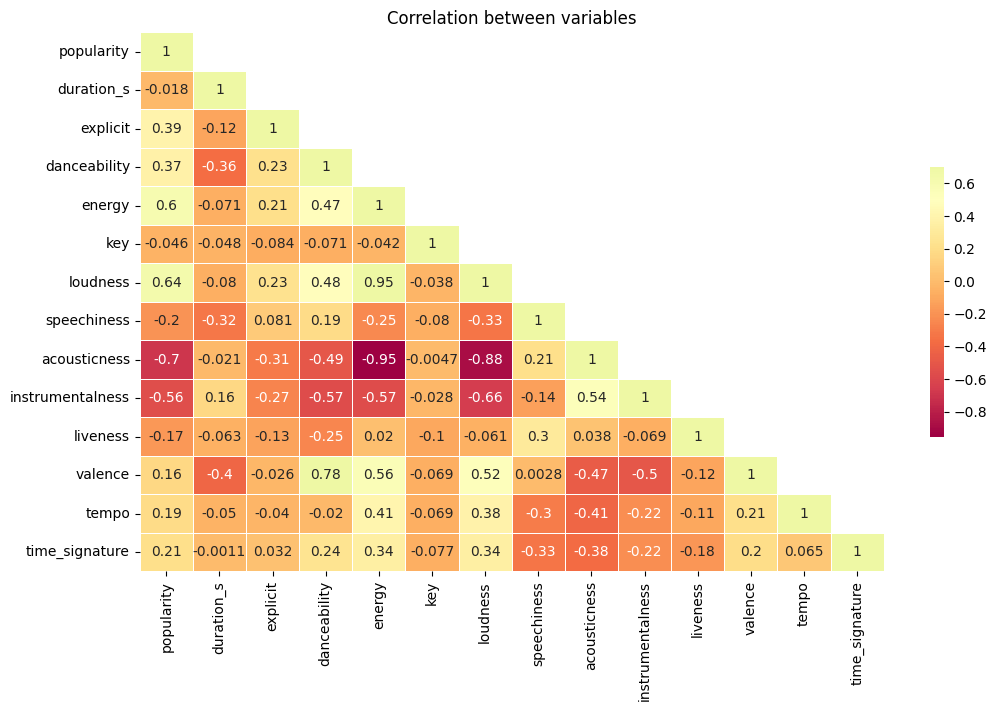

In [12]:
# Correlation matrix between variables

# Dropping rows without a numeric value
df_coMatrix = df_tracks.drop(['id', 'name', 'artists', 'id_artists', 'release_date', 'mode'], axis=1)

# Color for the heatmap
cmap = sn.color_palette("Spectral", as_cmap=True)

# For masking the triangle above diagonal
df_coMatrix = df_coMatrix.corr()
mask = np.triu(np.ones_like(df_coMatrix, dtype=None), 1)

# Fix the size with pyplot
f, ax = py.subplots(figsize=(12, 7))

# Display the heatmap with mask & color
display(sn.heatmap(df_coMatrix.corr(), mask=mask, cmap=cmap, annot=True, vmax=.7, center=0.5, square=False, linewidths=0.5, cbar_kws={"shrink": .5}).set(title='Correlation between variables'))

[Text(0.5, 1.0, 'Loudness vs Energy')]

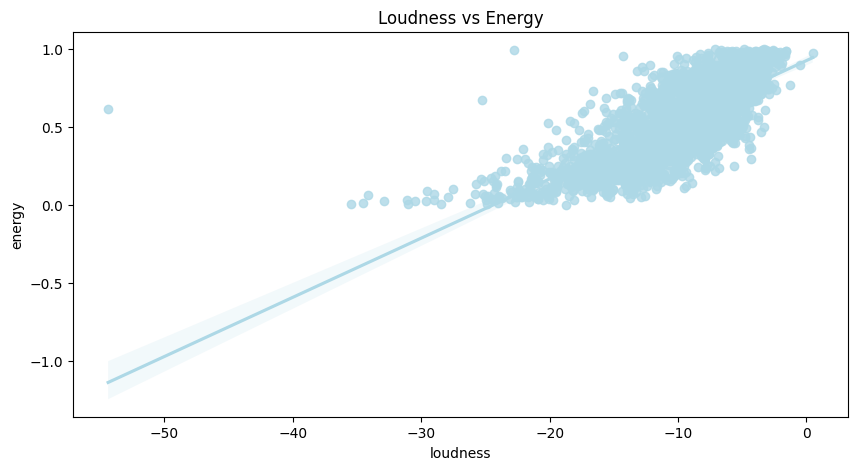

In [13]:
# Correlation between loudness & energy

py.figure(figsize=(10,5))
sn.regplot(x = 'loudness', y = 'energy', data=df_tracks.sample(2500), color='lightblue', dropna=True).set(title='Loudness vs Energy')

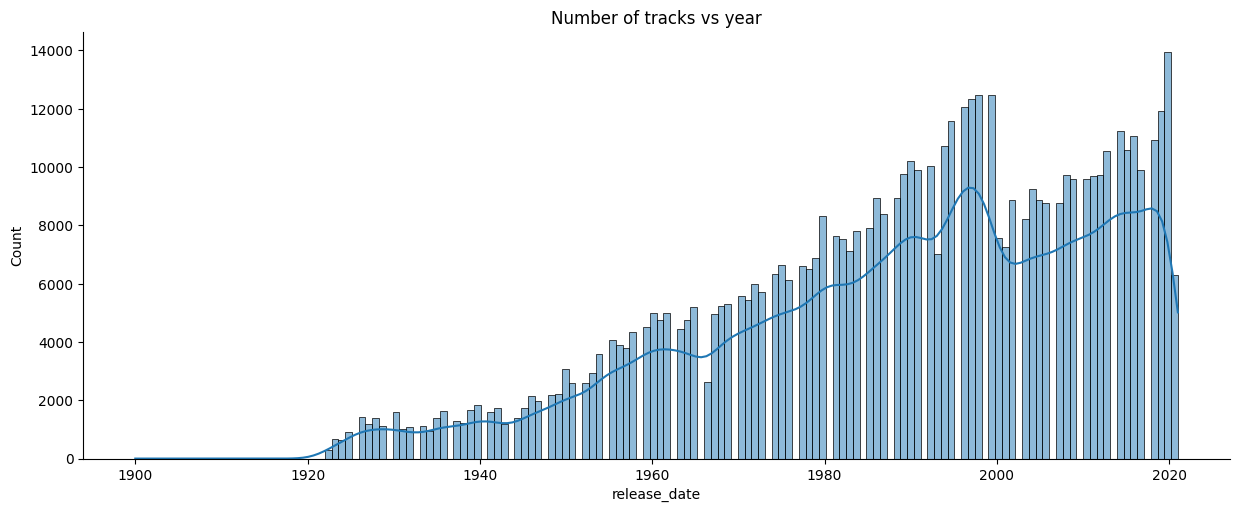

In [14]:
# Line graph for finding out change in number of sound tracks yearly

years = pd.to_datetime(df_tracks.release_date).dt.year
sn.displot(years, kde=True, aspect=2.5).set(title='Number of tracks vs year')

[Text(0.5, 1.0, 'Acousticness vs Popularity')]

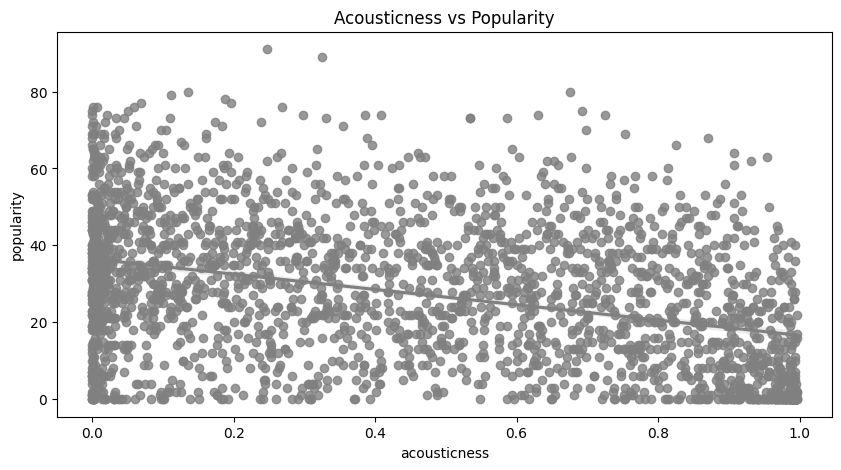

In [15]:
# Correlation between acousticness & popularity

py.figure(figsize=(10,5))
sn.regplot(x='acousticness', y='popularity', color='grey', data=df_tracks.sample(2500, replace=True), dropna=True).set(title='Acousticness vs Popularity')

Average duration of songs: 230.05


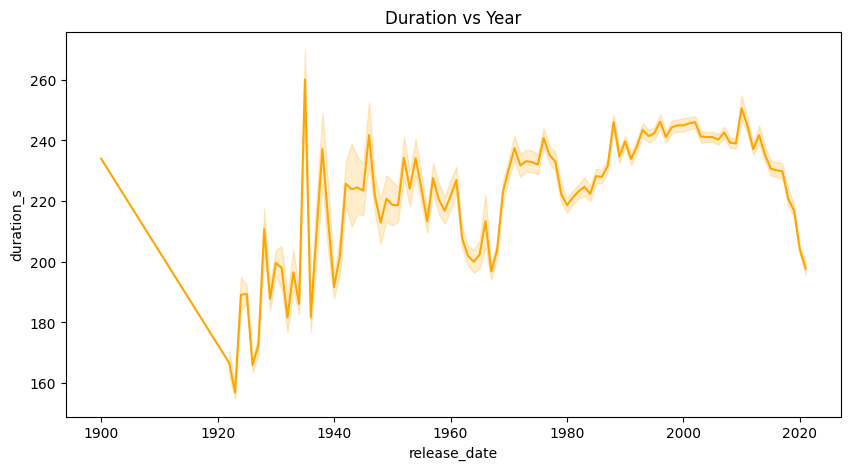

In [16]:
# Duration of songs with time

duration_ = df_tracks.duration_s

py.figure(figsize=(10,5))
sn.lineplot(x=years, y=duration_, color='orange').set(title='Duration vs Year')

# Average duration of songs
print("Average duration of songs:", round((duration_.mean()), 2))